## The Sparks Foundation
## Task - 1

## Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

## Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Author: Nihal Kuthe

In [1]:
# Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read data from link
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


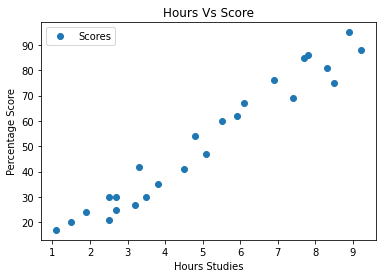

In [5]:
# Plotting the data distribution
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours Vs Score')
plt.xlabel('Hours Studies')
plt.ylabel('Percentage Score')
plt.show()

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing Data

The next step is to divide the data into 'Attribute' and 'Labels'

In [6]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

### Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [8]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print('Training Complete')

Training Complete


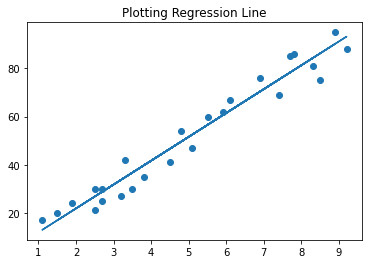

In [9]:
# Plotting the Regression Line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.title('Plotting Regression Line')
plt.plot(X, line);
plt.show()

### Making Prediction
Now that we have trained our algorithm, it's time to make some predictions.

In [10]:
print(X_test)   # Testing data in hours
y_pred = regressor.predict(X_test)  # Predicting Score

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Comparing Actual Vs Predicted

In [11]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [12]:
# Now we test with our own data
hrs = 9.25
own_pred = regressor.predict([[hrs]])
print('Number of hours = {}'.format(hrs))
print('Predicted score = {}'.format(own_pred[0]))

Number of hours = 9.25
Predicted score = 93.69173248737538


If the student studies for 9.25 hr/day so its score prediction is 93.69.

### Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [13]:
from sklearn import metrics
print('Mean Absolute Error:',
     metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
